In [11]:
%%capture
!pip install pandas
!pip install matplotlib
!pip install numpy


In [13]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np


In [48]:
with open('./data/dreps_data.json', 'r') as file:
    data = json.load(file)
    df = pd.DataFrame(data["rows"])
df['live_stake'] = pd.to_numeric(df['live_stake'], errors='coerce') / 1_000_000
print(df["live_stake"].tail())
print(df.columns)

926    0.0
927    0.0
928    0.0
929    0.0
930    0.0
Name: live_stake, dtype: float64
Index(['hash', 'bech32_legacy', 'has_script', 'tx_hash', 'url', 'comment',
       'payment_address', 'given_name', 'objectives', 'motivations',
       'qualifications', 'image', 'live_stake', 'delegator', 'tx_time',
       'last_active_epoch', 'bech32'],
      dtype='object')


In [49]:
def calculate_data_for_lorenz(df,column:str):
    # Convert 'live_stake' to numeric (in case it's a string)
    df[column] = pd.to_numeric(df[column], errors='coerce').fillna(0)

    # Sort the values in ascending order
    sorted_stake = np.sort(df[column].values)

    # Calculate cumulative share of stake
    cumulative_stake = np.cumsum(sorted_stake)
    cumulative_stake_share = cumulative_stake / cumulative_stake[-1]  # normalize to 1

    # Calculate cumulative share of entities (e.g., voters or delegators)
    n = len(sorted_stake)
    cumulative_entities = np.arange(1, n + 1) / n
    return cumulative_entities, cumulative_stake_share
    

In [18]:
kneset_data = [32,24,14,12,11,7,6,5,5,4]
df_knestet = pd.DataFrame(kneset_data, columns=["seats"])


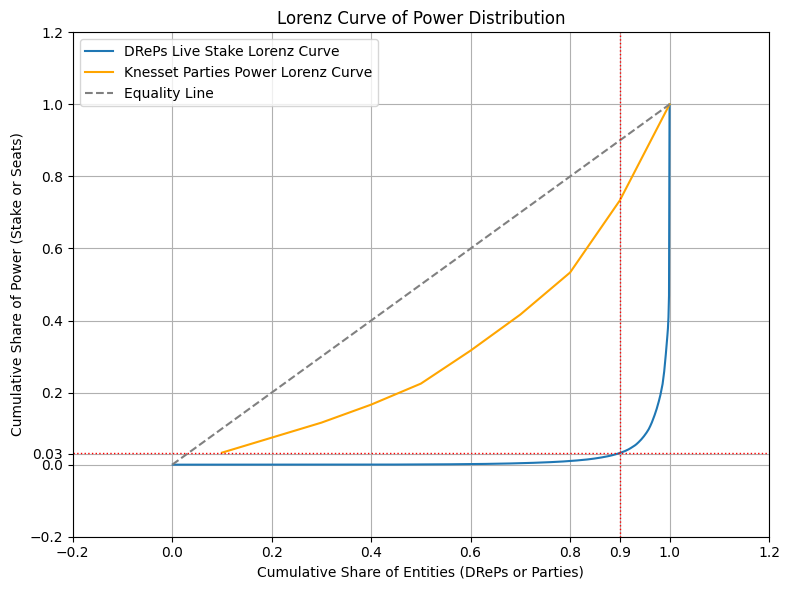

In [61]:

# Calculate Lorenz data
cumulative_entities_drep_live_stake, cumulative_stake_share_drep_live_stake = calculate_data_for_lorenz(df, "live_stake")
cumulative_entities_kneset, cumulative_stake_share_kneset = calculate_data_for_lorenz(df_knestet, "seats")

# Calculate DRep top 10% power
live_stakes = pd.to_numeric(df['live_stake'], errors='coerce').fillna(0).sort_values().values
total_stake = live_stakes.sum()
cutoff_10 = int(len(live_stakes) * 0.9)
top_10_power = live_stakes[cutoff_10:].sum() / total_stake

# Plot
plt.figure(figsize=(8, 6))
plt.plot(cumulative_entities_drep_live_stake, cumulative_stake_share_drep_live_stake,
         label='DRePs Live Stake Lorenz Curve')
plt.plot(cumulative_entities_kneset, cumulative_stake_share_kneset,
         label='Knesset Parties Power Lorenz Curve', color='orange')
plt.plot([0, 1], [0, 1], '--', color='gray', label='Equality Line')

# Add 10% vertical and horizontal insight lines
plt.axvline(0.9, color='red', linestyle=':', linewidth=1)
plt.axhline(1 - top_10_power, color='red', linestyle=':', linewidth=1)

# Add tick labels at those points without removing default ticks
xticks, xticklabels = plt.xticks()
yticks, yticklabels = plt.yticks()

# Add 90% to x-axis ticks
if 0.9 not in xticks:
    xticks = np.append(xticks, 0.9)
    xticklabels = list(xticklabels) + ['0.9']

# Add corresponding y-axis label
rounded_y = round(1 - top_10_power, 2)
if rounded_y not in yticks:
    yticks = np.append(yticks, rounded_y)
    yticklabels = list(yticklabels) + [f'{rounded_y}']

plt.xticks(xticks, xticklabels)
plt.yticks(yticks, yticklabels)

# Final plot setup
plt.title("Lorenz Curve of Power Distribution")
plt.xlabel("Cumulative Share of Entities (DRePs or Parties)")
plt.ylabel("Cumulative Share of Power (Stake or Seats)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('lurenz_curve.pdf')
plt.show()

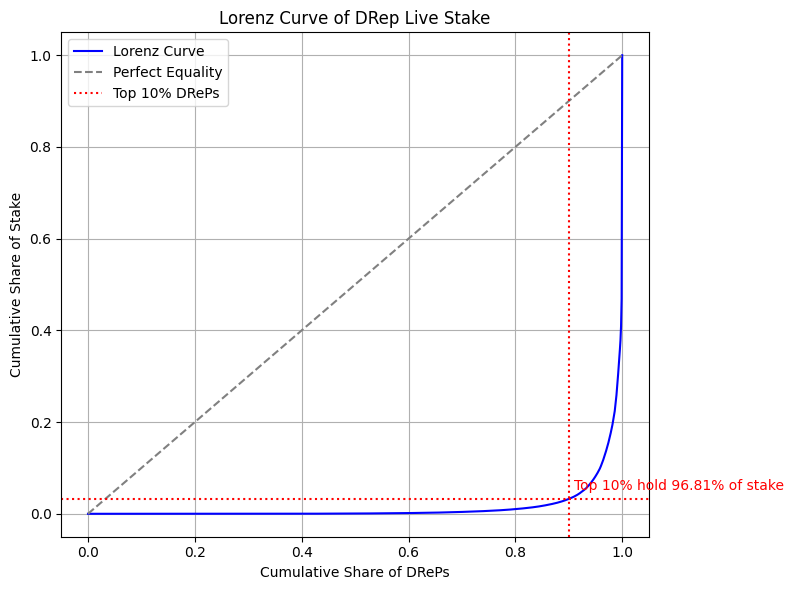

In [53]:
# Make sure live_stake is numeric and drop NaNs
df['live_stake'] = pd.to_numeric(df['live_stake'], errors='coerce').fillna(0)
stakes = df['live_stake'].sort_values().values

# Normalize the values
cumulative_stake = np.cumsum(stakes)
total_stake = cumulative_stake[-1]
lorenz_y = cumulative_stake / total_stake
lorenz_x = np.linspace(0, 1, len(stakes))

# Plot Lorenz Curve
plt.figure(figsize=(8, 6))
plt.plot(lorenz_x, lorenz_y, label="Lorenz Curve", color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="Perfect Equality")

# Compute top 10% power share
top_10_cutoff_index = int(len(stakes) * 0.9)
power_top_10_percent = stakes[top_10_cutoff_index:].sum() / total_stake

# Annotate it
plt.axvline(0.9, color='red', linestyle=':', label='Top 10% DRePs')
plt.axhline(1 - power_top_10_percent, color='red', linestyle=':')
plt.text(0.91, 1 - power_top_10_percent + 0.02,
         f"Top 10% hold {power_top_10_percent:.2%} of stake",
         color='red')

# Labels and legend
plt.title("Lorenz Curve of DRep Live Stake")
plt.xlabel("Cumulative Share of DRePs")
plt.ylabel("Cumulative Share of Stake")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

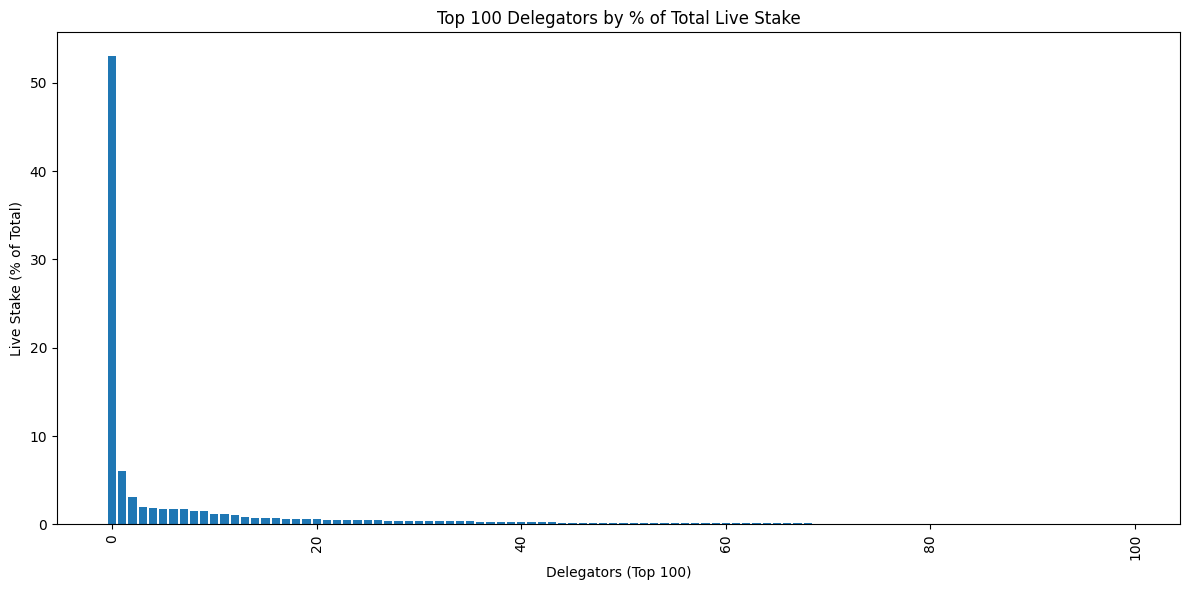

In [62]:
# Sort and select top 100
top_df = df.sort_values('live_stake', ascending=False).head(100)

# Compute percentage of total stake
total_stake = df['live_stake'].sum()
top_df['stake_pct'] = top_df['live_stake'] / total_stake * 100

# Plot
plt.figure(figsize=(12, 6))
plt.bar(range(100), top_df['stake_pct'])
plt.xticks(rotation=90)
plt.title("Top 100 Delegators by % of Total Live Stake")
plt.ylabel("Live Stake (% of Total)")
plt.xlabel("Delegators (Top 100)")
plt.tight_layout()
plt.savefig("top_100_delegators.pdf")
plt.show()

In [74]:
participation_list = "83.33%50.00%83.33%33.33%83.33%66.67%60.00%50.00%83.33%83.33%83.33%50.00%100.00%83.33%50.00%83.33%83.33%66.67%66.67%33.33%66.67%100.00%100.00%83.33%83.33%100.00%50.00%83.33%83.33%83.33%100.00%33.33%16.67%100.00%83.33%100.00%33.33%66.67%50.00%100.00%83.33%66.67%66.67%83.33%83.33%100.00%83.33%83.33%66.67%83.33%100.00%16.67%83.33%66.67%83.33%66.67%100.00%83.33%50.00%83.33%83.33%83.33%33.33%83.33%16.67%50.00%83.33%100.00%0.00%0.00%0.00%100.00%100.00%50.00%83.33%50.00%83.33%66.67%83.33%50.00%83.33%66.67%50.00%0.00%83.33%100.00%83.33%0.00%66.67%83.33%100.00%100.00%16.67%100.00%83.33%33.33%33.33%66.67%83.33%66.67%100.00%33.33%33.33%83.33%100.00%83.33%66.67%100.00%83.33%50.00%100.00%16.67%83.33%100.00%100.00%50.00%66.67%50.00%50.00%16.67%100.00%83.33%83.33%50.00%50.00%66.67%33.33%83.33%66.67%83.33%50.00%83.33%16.67%16.67%66.67%83.33%100.00%50.00%83.33%83.33%66.67%66.67%66.67%33.33%83.33%16.67%50.00%100.00%33.33%83.33%83.33%16.67%33.33%0.00%50.00%33.33%83.33%0.00%0.00%66.67%100.00%0.00%50.00%16.67%83.33%83.33%66.67%50.00%33.33%16.67%100.00%33.33%83.33%83.33%100.00%66.67%50.00%83.33%66.67%33.33%100.00%16.67%66.67%66.67%0.00%16.67%0.00%83.33%0.00%100.00%66.67%33.33%83.33%33.33%83.33%0.00%16.67%0.00%83.33%100.00%83.33%83.33%16.67%100.00%40.00%33.33%83.33%50.00%0.00%16.67%66.67%66.67%83.33%16.67%100.00%0.00%100.00%83.33%16.67%0.00%33.33%100.00%0.00%83.33%50.00%50.00%66.67%66.67%33.33%0.00%0.00%50.00%66.67%83.33%0.00%100.00%16.67%33.33%100.00%100.00%83.33%16.67%33.33%100.00%50.00%66.67%33.33%66.67%33.33%16.67%0.00%0.00%0.00%16.67%83.33%0.00%0.00%0.00%83.33%83.33%83.33%100.00%66.67%83.33%100.00%83.33%100.00%33.33%16.67%80.00%0.00%16.67%83.33%0.00%0.00%83.33%0.00%50.00%16.67%0.00%75.00%0.00%0.00%83.33%50.00%33.33%0.00%33.33%100.00%50.00%83.33%0.00%0.00%66.67%0.00%33.33%100.00%83.33%16.67%33.33%83.33%66.67%50.00%0.00%0.00%33.33%16.67%66.67%50.00%66.67%100.00%100.00%0.00%0.00%33.33%0.00%50.00%33.33%83.33%100.00%100.00%50.00%16.67%100.00%33.33%83.33%83.33%50.00%0.00%0.00%33.33%50.00%66.67%50.00%0.00%16.67%33.33%50.00%66.67%0.00%66.67%16.67%83.33%33.33%16.67%0.00%83.33%0.00%0.00%0.00%83.33%0.00%66.67%100.00%100.00%83.33%0.00%0.00%83.33%0.00%100.00%100.00%16.67%50.00%0.00%100.00%33.33%0.00%66.67%0.00%50.00%0.00%50.00%83.33%50.00%0.00%0.00%83.33%33.33%33.33%33.33%83.33%50.00%0.00%33.33%50.00%83.33%0.00%66.67%33.33%33.33%50.00%0.00%66.67%66.67%0.00%66.67%100.00%33.33%100.00%0.00%0.00%33.33%0.00%0.00%0.00%50.00%50.00%66.67%16.67%83.33%0.00%16.67%0.00%0.00%66.67%100.00%0.00%83.33%83.33%0.00%100.00%66.67%0.00%66.67%0.00%0.00%16.67%0.00%83.33%0.00%0.00%0.00%0.00%16.67%0.00%0.00%50.00%66.67%33.33%66.67%33.33%50.00%0.00%83.33%0.00%0.00%0.00%0.00%83.33%50.00%33.33%100.00%83.33%50.00%0.00%0.00%83.33%50.00%0.00%16.67%0.00%0.00%0.00%83.33%83.33%33.33%0.00%0.00%66.67%16.67%83.33%66.67%50.00%0.00%0.00%0.00%0.00%0.00%33.33%50.00%0.00%0.00%0.00%0.00%100.00%0.00%50.00%100.00%16.67%0.00%16.67%33.33%83.33%100.00%50.00%0.00%16.67%66.67%0.00%0.00%20.00%0.00%0.00%33.33%33.33%0.00%50.00%16.67%50.00%0.00%16.67%66.67%33.33%16.67%50.00%0.00%33.33%0.00%33.33%0.00%33.33%0.00%66.67%16.67%0.00%0.00%0.00%83.33%0.00%0.00%0.00%16.67%0.00%50.00%100.00%0.00%16.67%16.67%83.33%0.00%0.00%83.33%100.00%66.67%0.00%0.00%50.00%0.00%33.33%0.00%0.00%33.33%0.00%0.00%0.00%0.00%83.33%66.67%0.00%0.00%100.00%0.00%0.00%16.67%83.33%0.00%0.00%25.00%0.00%0.00%0.00%0.00%0.00%0.00%33.33%100.00%0.00%66.67%40.00%83.33%50.00%0.00%50.00%0.00%0.00%0.00%33.33%16.67%33.33%0.00%66.67%16.67%0.00%33.33%16.67%0.00%0.00%0.00%66.67%50.00%0.00%16.67%0.00%0.00%0.00%0.00%0.00%33.33%0.00%0.00%16.67%0.00%0.00%0.00%0.00%0.00%66.67%25.00%50.00%0.00%83.33%0.00%0.00%16.67%50.00%100.00%0.00%0.00%0.00%0.00%0.00%0.00%66.67%0.00%0.00%0.00%33.33%0.00%33.33%16.67%0.00%66.67%0.00%50.00%40.00%0.00%83.33%0.00%0.00%16.67%0.00%0.00%0.00%83.33%0.00%0.00%16.67%0.00%66.67%0.00%0.00%33.33%0.00%66.67%0.00%16.67%0.00%0.00%0.00%33.33%0.00%0.00%0.00%0.00%0.00%0.00%0.00%0.00%0.00%50.00%0.00%0.00%0.00%0.00%0.00%0.00%16.67%0.00%83.33%50.00%0.00%0.00%0.00%0.00%0.00%0.00%16.67%0.00%0.00%16.67%0.00%33.33%0.00%40.00%0.00%0.00%33.33%0.00%0.00%0.00%16.67%16.67%0.00%0.00%50.00%0.00%100.00%0.00%0.00%0.00%0.00%0.00%0.00%75.00%0.00%50.00%16.67%0.00%0.00%0.00%0.00%0.00%0.00%16.67%0.00%0.00%16.67%0.00%0.00%0.00%0.00%83.33%0.00%0.00%0.00%16.67%0.00%0.00%0.00%0.00%0.00%0.00%0.00%0.00%0.00%16.67%0.00%0.00%0.00%0.00%0.00%83.33%0.00%0.00%0.00%0.00%0.00%25.00%0.00%0.00%0.00%16.67%0.00%33.33%0.00%50.00%0.00%0.00%0.00%0.00%0.00%0.00%33.33%33.33%0.00%0.00%0.00%0.00%0.00%0.00%0.00%0.00%0.00%0.00%0.00%0.00%16.67%0.00%66.67%0.00%0.00%0.00%0.00%0.00%0.00%0.00%16.67%0.00%0.00%0.00%".split('%')
participation_list = [float(x) for x in data if x!='']
print(participation_list)

[83.33, 50.0, 83.33, 33.33, 83.33, 66.67, 60.0, 50.0, 83.33, 83.33, 83.33, 50.0, 100.0, 83.33, 50.0, 83.33, 83.33, 66.67, 66.67, 33.33, 66.67, 100.0, 100.0, 83.33, 83.33, 100.0, 50.0, 83.33, 83.33, 83.33, 100.0, 33.33, 16.67, 100.0, 83.33, 100.0, 33.33, 66.67, 50.0, 100.0, 83.33, 66.67, 66.67, 83.33, 83.33, 100.0, 83.33, 83.33, 66.67, 83.33, 100.0, 16.67, 83.33, 66.67, 83.33, 66.67, 100.0, 83.33, 50.0, 83.33, 83.33, 83.33, 33.33, 83.33, 16.67, 50.0, 83.33, 100.0, 0.0, 0.0, 0.0, 100.0, 100.0, 50.0, 83.33, 50.0, 83.33, 66.67, 83.33, 50.0, 83.33, 66.67, 50.0, 0.0, 83.33, 100.0, 83.33, 0.0, 66.67, 83.33, 100.0, 100.0, 16.67, 100.0, 83.33, 33.33, 33.33, 66.67, 83.33, 66.67, 100.0, 33.33, 33.33, 83.33, 100.0, 83.33, 66.67, 100.0, 83.33, 50.0, 100.0, 16.67, 83.33, 100.0, 100.0, 50.0, 66.67, 50.0, 50.0, 16.67, 100.0, 83.33, 83.33, 50.0, 50.0, 66.67, 33.33, 83.33, 66.67, 83.33, 50.0, 83.33, 16.67, 16.67, 66.67, 83.33, 100.0, 50.0, 83.33, 83.33, 66.67, 66.67, 66.67, 33.33, 83.33, 16.67, 50.0, 10

Text(0.5, 1.0, 'Distribution of dReps Participation')

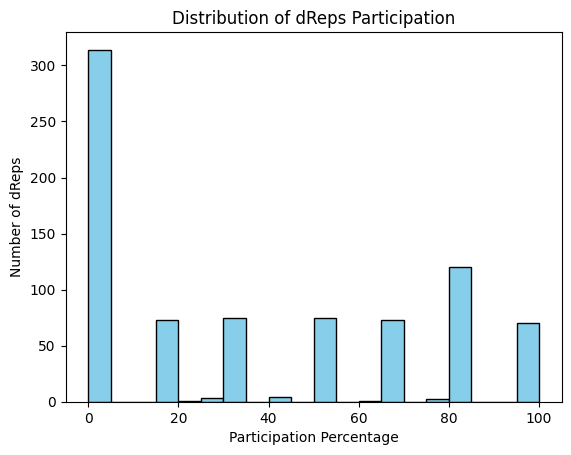

In [75]:
plt.hist(participation_list, bins=20, color='skyblue', edgecolor='black')
plt.xlabel("Participation Percentage")
plt.ylabel("Number of dReps")
plt.title("Distribution of dReps Participation")